#CSCE5222.002 Assignment_3
The assignment 3 is the combination of ICE 9 and ICE 10. You may find something helpful in these two ICEs

## Task 1. Edge detection <br>
In task 1, you need to apply different edge detection methods to an image. Please finish<br>
1. Apply sharpening filter to the image and display the edge image;
2. Apply Sobel filter to the image and display the edge image;
3. Apply Fourier transform to the image, apply high pass filter to the frequency domain graph, then recover the image to spatial domain and display the edge image in spatial domain;
4. Apply Fourier transform to the image, extract the phase part of the image, then recover the phase part of the image to spatial domain and display the phase part of the image in spatial domain.

In [1]:
import cv2
import random
import numpy as np
from math import sqrt,exp
import matplotlib.pyplot as plt

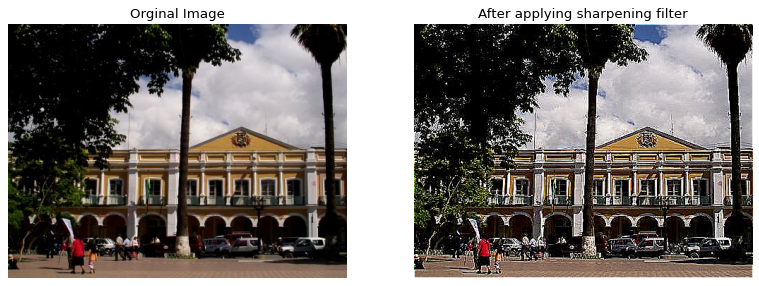

In [2]:
# sharpening filter
sharpen = np.array([[0, -2, 0],
                 [-2, 9,-2],
                 [0, -2, 0]])
img = cv2.imread("1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sharpen_img = cv2.filter2D(img,-1,kernel=sharpen, borderType=cv2.BORDER_CONSTANT)

fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(sharpen_img)
plt.axis('off')
ax2.title.set_text('After applying sharpening filter')

plt.show() 

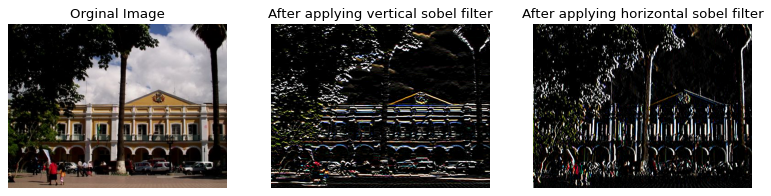

In [3]:
# sobel filter
# sobel vertical edge detection
sobel_ver = np.array([[-1,-2,-1], 
                   [0, 0, 0], 
                   [1, 2, 1]])

# sobel horizontal edge detection
sobel_hor = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
img_ver = cv2.filter2D(img,-1,kernel=sobel_ver, borderType=cv2.BORDER_CONSTANT)
img_hor = cv2.filter2D(img,-1,kernel=sobel_hor, borderType=cv2.BORDER_CONSTANT)

fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,3,1)
plt.imshow(img)
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,3,2)
plt.imshow(img_ver)
plt.axis('off')
ax2.title.set_text('After applying vertical sobel filter')

ax3 = fig.add_subplot(1,3,3)
plt.imshow(img_hor)
plt.axis('off')
ax3.title.set_text('After applying horizontal sobel filter')

plt.show() 

In [4]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base


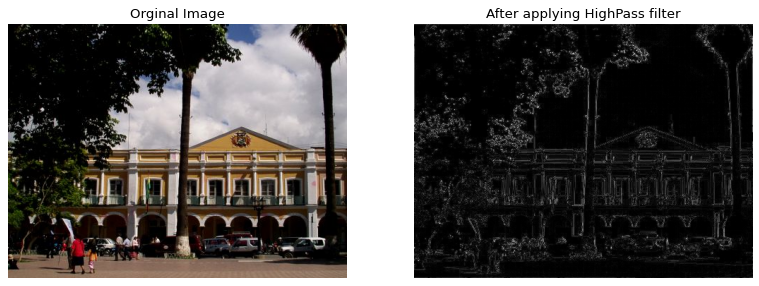

In [5]:
# highpass filter
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
original = np.fft.fftshift(np.fft.fft2(img_gray))

HighPassCenter = original * gaussianHP(150,img_gray.shape)
HighPass = np.fft.ifftshift(HighPassCenter)

inverse_HighPass = np.fft.ifft2(HighPass)

fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(np.abs(inverse_HighPass), cmap = 'gray')
plt.axis('off')
ax2.title.set_text('After applying HighPass filter')

plt.show() 

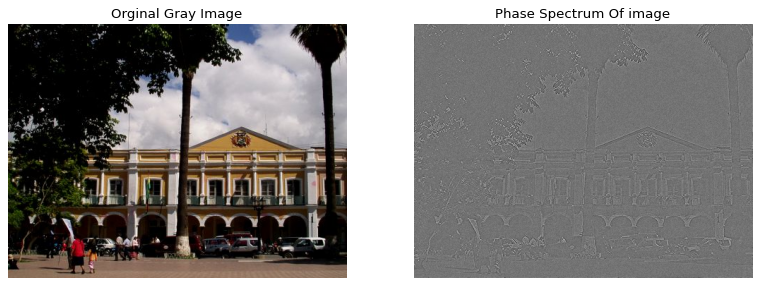

In [34]:
phase = np.angle(original)
img_phase = np.angle(np.fft.fft2(img_gray))
inverse_phase = np.fft.ifft2(np.exp(1j*img_phase))

fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
ax1.title.set_text('Orginal Gray Image')

ax2 = fig.add_subplot(1,2, 2)
plt.imshow(np.real(inverse_phase),cmap='gray')
plt.axis('off')
ax2.title.set_text("Phase Spectrum Of image")

plt.show() 


## Task 2. Image smoothing
In task 2, you need to apply different image smoothing methods to an image. Please finish<br>
1. Apply Gaussian smoothing filter to the image and display the result;
2. Apply Mean filter to the image and display the result;
3. Apply Fourier transform to the image, apply low pass filter to the frequency domain graph, then recover the image to spatial domain and display the result in spatial domain.

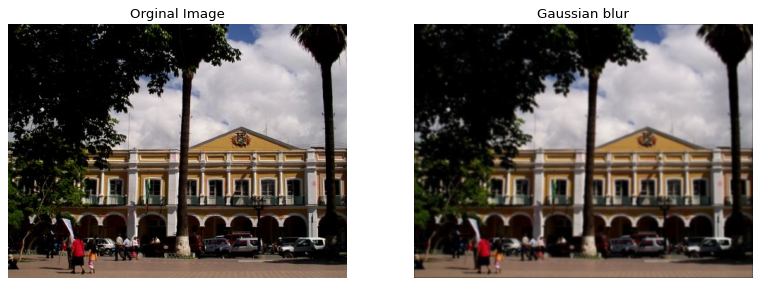

In [ ]:
#Gaussian smoothing filter
sigma = 1
dx = 1
dy = 1

x_n = 3 # x_n = 1 for 3 by 3 mask, x_n = 2 for 5 by 5 mask, x_n = 3 for 7 by 7 mask

x = np.arange(-x_n, x_n + 1, dx)
y = np.arange(-x_n, x_n + 1, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / sum(sum(kernel_2d))

img_blur = cv2.filter2D(img,-1,kernel_2d, borderType=cv2.BORDER_CONSTANT) 

fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur, cmap = 'gray')
plt.axis('off')
ax2.title.set_text('Gaussian blur')

plt.show() 

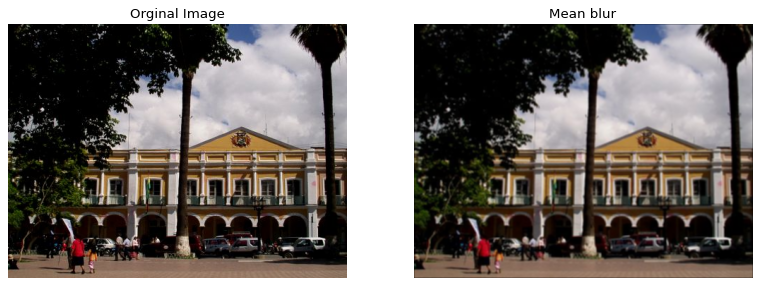

In [ ]:
# mean filter
mean = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
img_mean = cv2.filter2D(img,-1,mean, borderType=cv2.BORDER_CONSTANT)
fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(img_mean, cmap = 'gray')
plt.axis('off')
ax2.title.set_text('Mean blur')

plt.show() 

In [ ]:
# lowpass filter
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 255
    return base

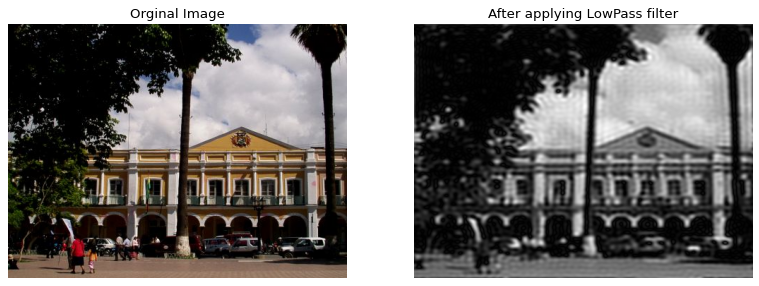

In [ ]:
LowPassCenter = original * idealFilterLP(50,img_gray.shape)
LowPass = np.fft.ifftshift(LowPassCenter)

inverse_LowPass = np.fft.ifft2(LowPass)

fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(np.abs(inverse_LowPass), cmap = 'gray')
plt.axis('off')
ax2.title.set_text('After applying LowPass filter')

plt.show() 

## Task 3. Noise removing
In task 3, you need to apply different noise removing methods to an image. Please finish<br>
1. Add salt and pepper noise to an image and display the noisy image;
2. Apply Median filter to the noisy image to remove the noise and display the result;
3. Apply Fourier transform to the noisy image, apply band-pass filter to the frequency domain graph, recover the output to spatial domain and display the result.

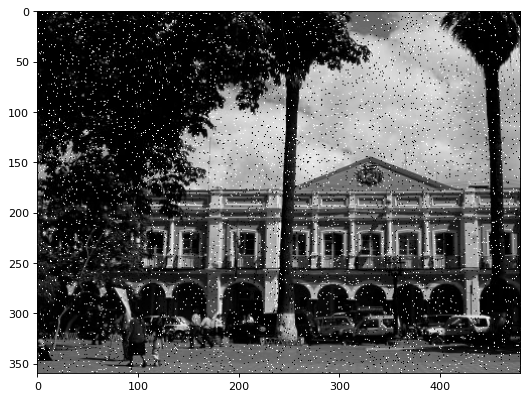

In [ ]:
# add salt and pepper noise
from skimage.util import random_noise
img_noise = random_noise(img_gray, mode='s&p',amount=0.05)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img_noise, cmap = 'gray')

In [ ]:
img_noise.shape

(360, 480, 3)

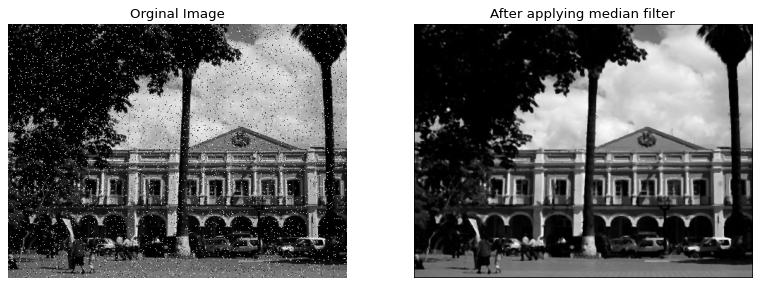

In [ ]:
# median filter
m, n = img_noise.shape
  
# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noise[i-1, j-1],
               img_noise[i-1, j],
               img_noise[i-1, j + 1],
               img_noise[i, j-1],
               img_noise[i, j],
               img_noise[i, j + 1],
               img_noise[i + 1, j-1],
               img_noise[i + 1, j],
               img_noise[i + 1, j + 1]]
         
        temp = sorted(temp)
        img_new[i, j]= temp[4]
 
fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img_noise, cmap = 'gray')
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap = 'gray')
plt.axis('off')
ax2.title.set_text('After applying median filter')

plt.show() 

In [ ]:
# bandpass filter
def idealFilterBP(D_l, D_h,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D_h and distance((y,x), center) > D_l:
                base[y,x] = 255
    return base

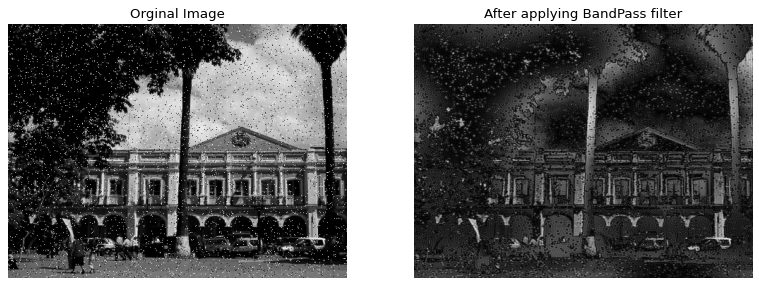

In [ ]:
original = np.fft.fftshift(np.fft.fft2(img_noise))
BandPassCenter = original * idealFilterBP(3, 150,img_noise.shape)
BandPass = np.fft.ifftshift(BandPassCenter)

inverse_BandPass = np.fft.ifft2(BandPass)

fig = plt.figure(figsize=(12, 5), dpi=80)

ax1 = fig.add_subplot(1,2,1)
plt.imshow(img_noise,cmap = 'gray')
plt.axis('off')
ax1.title.set_text('Orginal Image')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(np.abs(inverse_BandPass), cmap = 'gray')
plt.axis('off')
ax2.title.set_text('After applying BandPass filter')

plt.show() 